In [4]:
import sys

sys.path.append("../src")

import librosa
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

from utils.make_eqs import make_random_eq

In [5]:
path = "../data/genres_original/blues/blues.00000.wav"
# spec = np.load(path)
wav, sr = librosa.load(path, sr=None)
print(wav.shape)
ipd.Audio(wav, rate=sr)

(661794,)


(1025,)


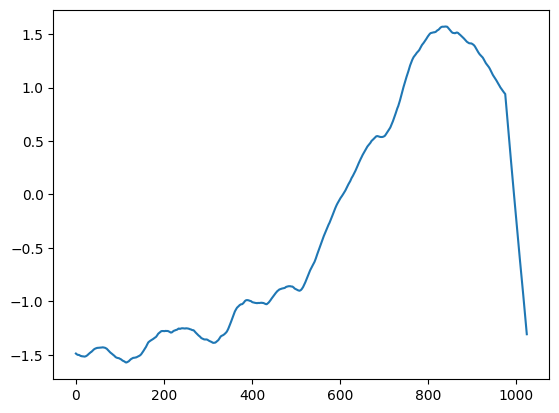

In [13]:
eq = make_random_eq(1025, min_db=-np.pi / 2, max_db=np.pi / 2, ma_window=50)
print(eq.shape)
plt.plot(eq)

In [14]:
spec = librosa.stft(wav)
mag, phase = np.abs(spec), np.angle(spec)
filtered_phase = phase * eq[:, np.newaxis]
filtered_spec = mag * np.exp(1j * filtered_phase)
filtered_wav = librosa.istft(filtered_spec)
ipd.Audio(filtered_wav, rate=sr)

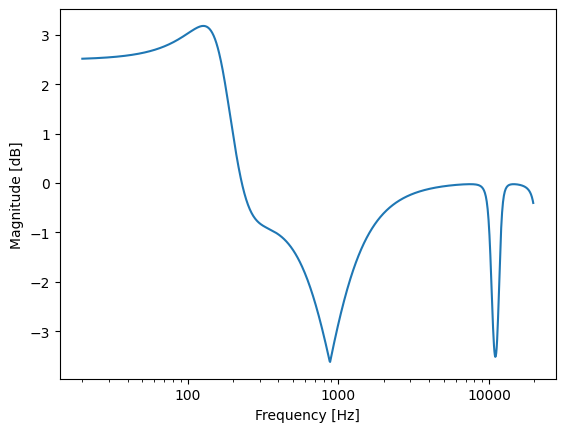

In [4]:
# eq = np.random.rand(spec.shape[0])
# print(eq.shape)
# plt.plot(eq)

import audio_dspy as adsp
import numpy as np
import matplotlib.pyplot as plt

fs = 44100 // 2  # sample rate
worN = np.logspace(1, 3.3, num=1000, base=20)  # frequencies to plot

# design EQ
eq = adsp.EQ(fs)
eq.add_LPF(10000, 0.707)
eq.add_lowshelf(200, 1.4, 2)
eq.add_notch(880, 0.707)


# plot EQ magnitude response
eq.plot_eq_curve(worN=worN)
plt.show()

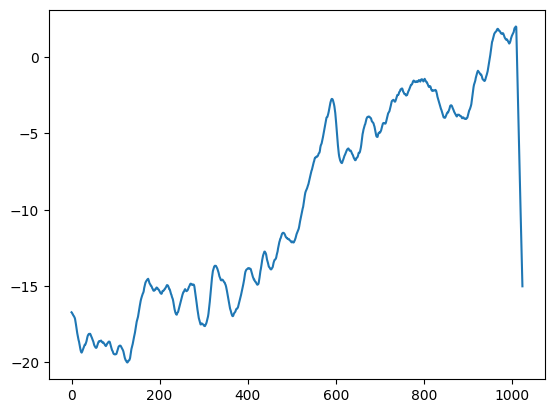

In [6]:
# def f(x):
#     y = 0
#     result = []
#     for _ in x:
#         result.append(y)
#         y += np.random.normal(scale=1)
#     return np.array(result)


# def runningMean(x, N):
#     return np.convolve(x, np.ones((N,)) / N)[(N - 1) :]


# def rescale(x, min, max):
#     return (x - np.min(x)) / (np.max(x) - np.min(x)) * (max - min) + min


# def db2mag(x):
#     return np.power(10, x / 20)


# x = np.linspace(0, 1025, 1025)
# filter = f(x)
# filter = runningMean(filter, 15)
# filter = rescale(filter, -20, 2)
# filter = db2mag(filter)
# inv_filter = 1 / filter
# plt.plot(filter)
# plt.plot(inv_filter)

filter = np.load("../data/random_walk_eqs_db/00000.npy")
plt.plot(filter)
plt.show()

In [8]:
magspec_eq = magspec * filter[:, np.newaxis]

In [9]:
# spec_eq = magspec_eq * np.exp(1j * np.angle(spec))
eq_spec = spec * filter[:, np.newaxis]
wav = librosa.istft(eq_spec)
ipd.Audio(wav, rate=22050)

In [10]:
orig_wav = librosa.istft(spec)
ipd.Audio(orig_wav, rate=22050)

In [11]:
restored_magspec = magspec_eq * inv_filter[:, np.newaxis]
restored_spec = restored_magspec * np.exp(1j * np.angle(spec))
restored_wav = librosa.istft(restored_spec)
ipd.Audio(restored_wav, rate=22050)